In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

import zipfile
archive = zipfile.ZipFile('/content/gdrive/MyDrive/antispoofing_big.zip')
archive.extractall('/content')

In [ ]:
from IPython import display
print("Original Vs New Dataset Structure")
display.Image('original vs new_dataset.png')

In [3]:
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'

In [4]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [5]:
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

In [6]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [8]:
train_test_splits(data_directory=dataset_dir)

In [9]:
categories = ['real','spoof']

In [10]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 3896 images in real directory
There are 3585 images in spoof directory
There are 7481 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 1429 images in real directory
There are 1308 images in spoof directory
There are 2737 total images in testing directory


In [11]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [12]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [13]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/sumit_shrestha_71_face.jpg', '/content/antispoofing_dataset/train/real/prakriti_adhikari_232_face.jpg', '/content/antispoofing_dataset/train/real/20201110_113507.jpg', '/content/antispoofing_dataset/train/real/sirjana kcresized46_face.jpg', '/content/antispoofing_dataset/train/real/20201110_145020(0).jpg', '/content/antispoofing_dataset/train/real/sirjana kcresized22_face.jpg', '/content/antispoofing_dataset/train/real/ujjwal_gautam_87_face.jpg', '/content/antispoofing_dataset/train/real/fjkdj36.jpg', '/content/antispoofing_dataset/train/real/20201110_113512hr_flip.jpg', '/content/antispoofing_dataset/train/real/hghgh6.jpg', '/content/antispoofing_dataset/train/real/ghjknhgj38.jpg', '/content/antispoofing_dataset/train/real/rftfyhbjnk18.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_21_54_Pro.jpg', '/content/antispoofing_dataset/train/real/sarishma shrestharesized16_face.jpg', '/content/antispoofing_dataset/train/real/tanka_91

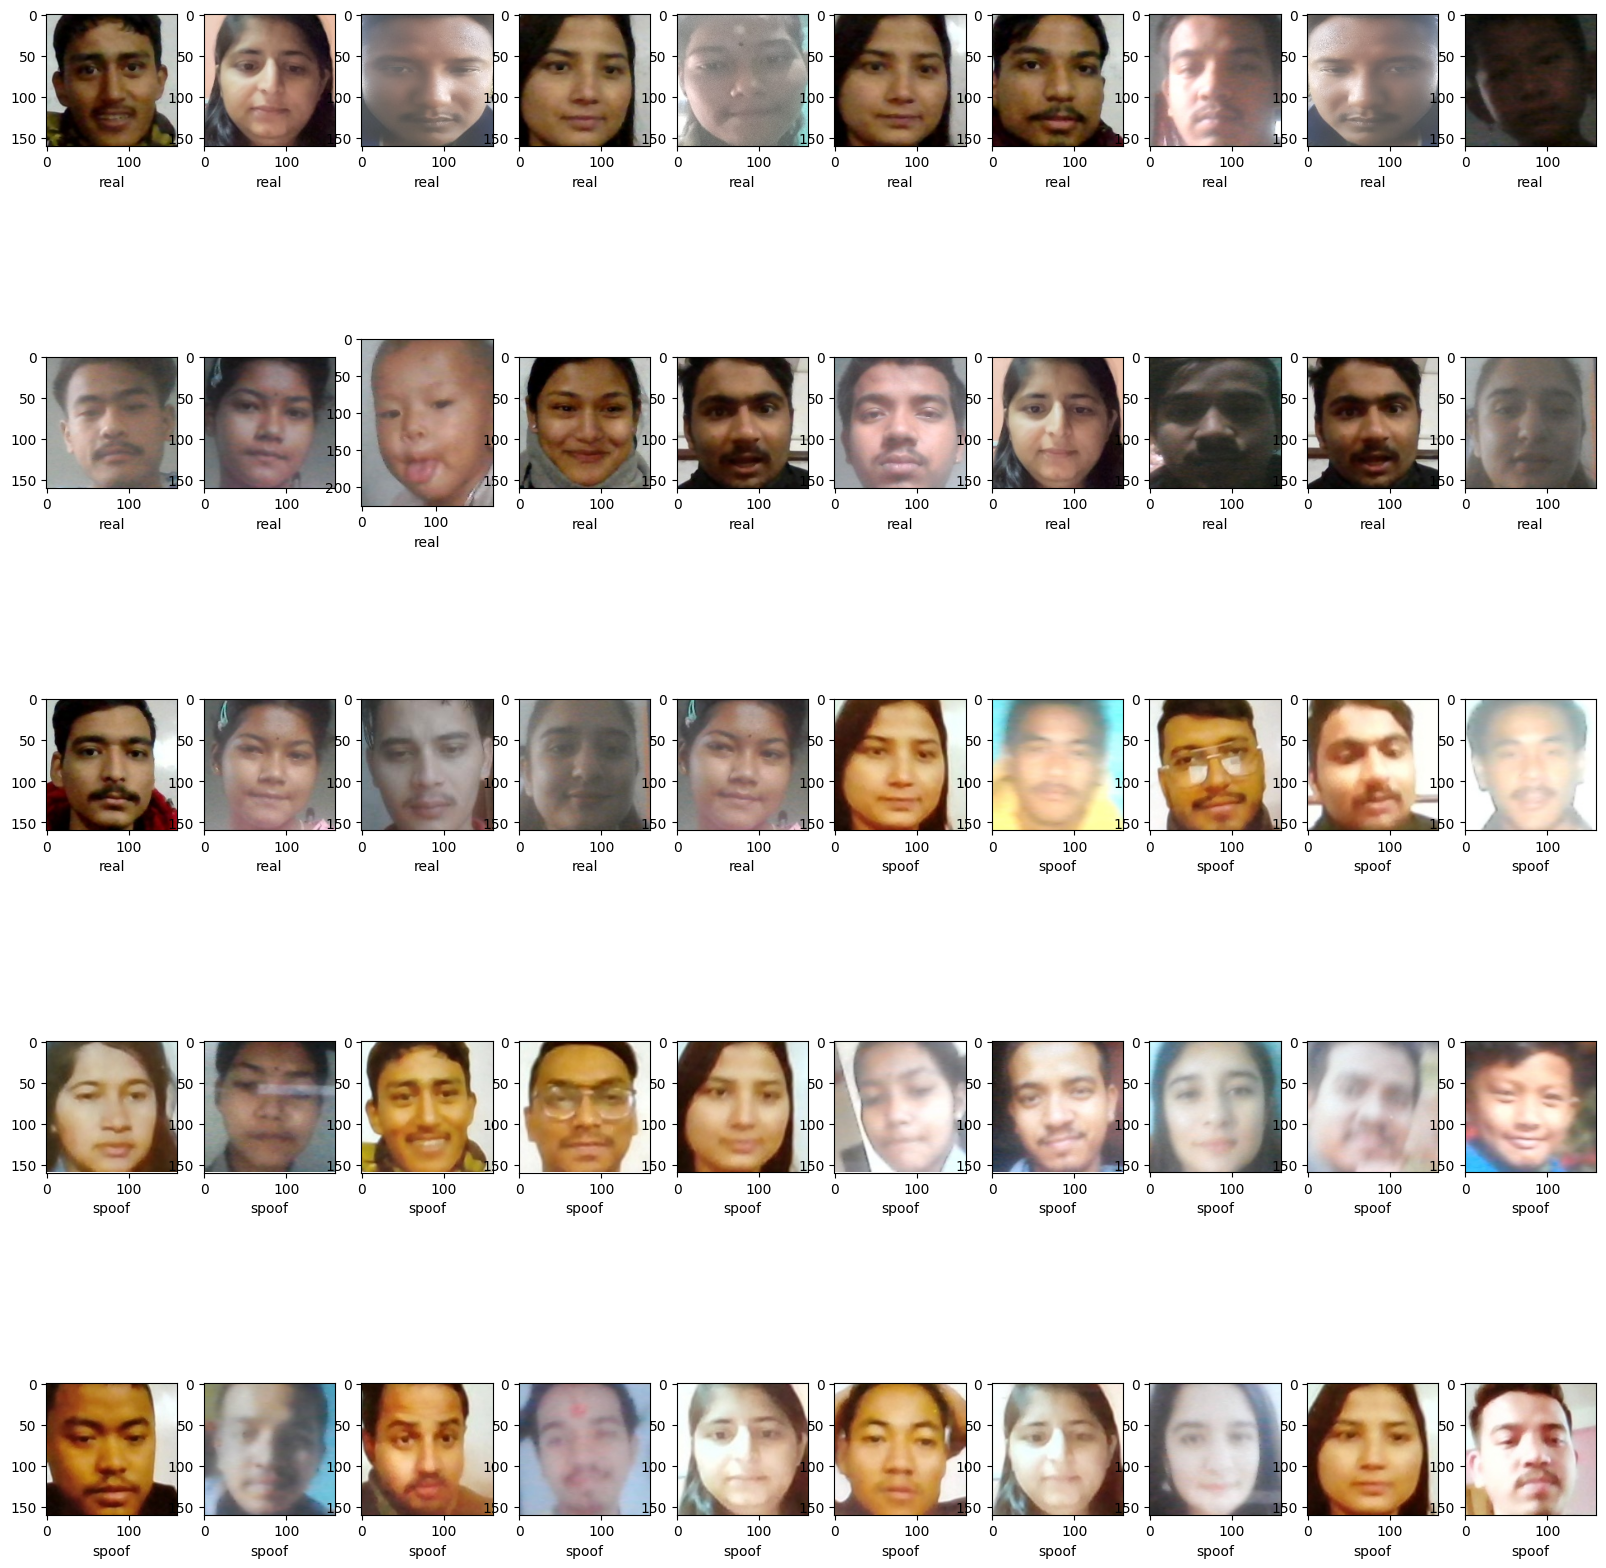

In [14]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

In [15]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/ujjwal_gautam_17_face.jpg', '/content/antispoofing_dataset/test/real/shinja_thapa_57_face.jpg', '/content/antispoofing_dataset/test/real/bhawana_prasain_579_face.jpg', '/content/antispoofing_dataset/test/real/salim_rana_33_face.jpg', '/content/antispoofing_dataset/test/real/aashis_pandey_35_face.jpg', '/content/antispoofing_dataset/test/real/bhawana_prasain_486_face.jpg', '/content/antispoofing_dataset/test/real/sirjana_kc_9_face.jpg', '/content/antispoofing_dataset/test/real/prakriti_adhikari_285_face.jpg', '/content/antispoofing_dataset/test/real/sumit_shrestha_91_face.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam22brightness1.3.jpg', '/content/antispoofing_dataset/test/real/abhishek_pariyar_74_face.jpg', '/content/antispoofing_dataset/test/real/bhawana_prasain_534_face.jpg', '/content/antispoofing_dataset/test/real/shinja_thapa_38_face.jpg', '/content/antispoofing_dataset/test/real/d_91_face.jpg', '/content/antispoofing_data

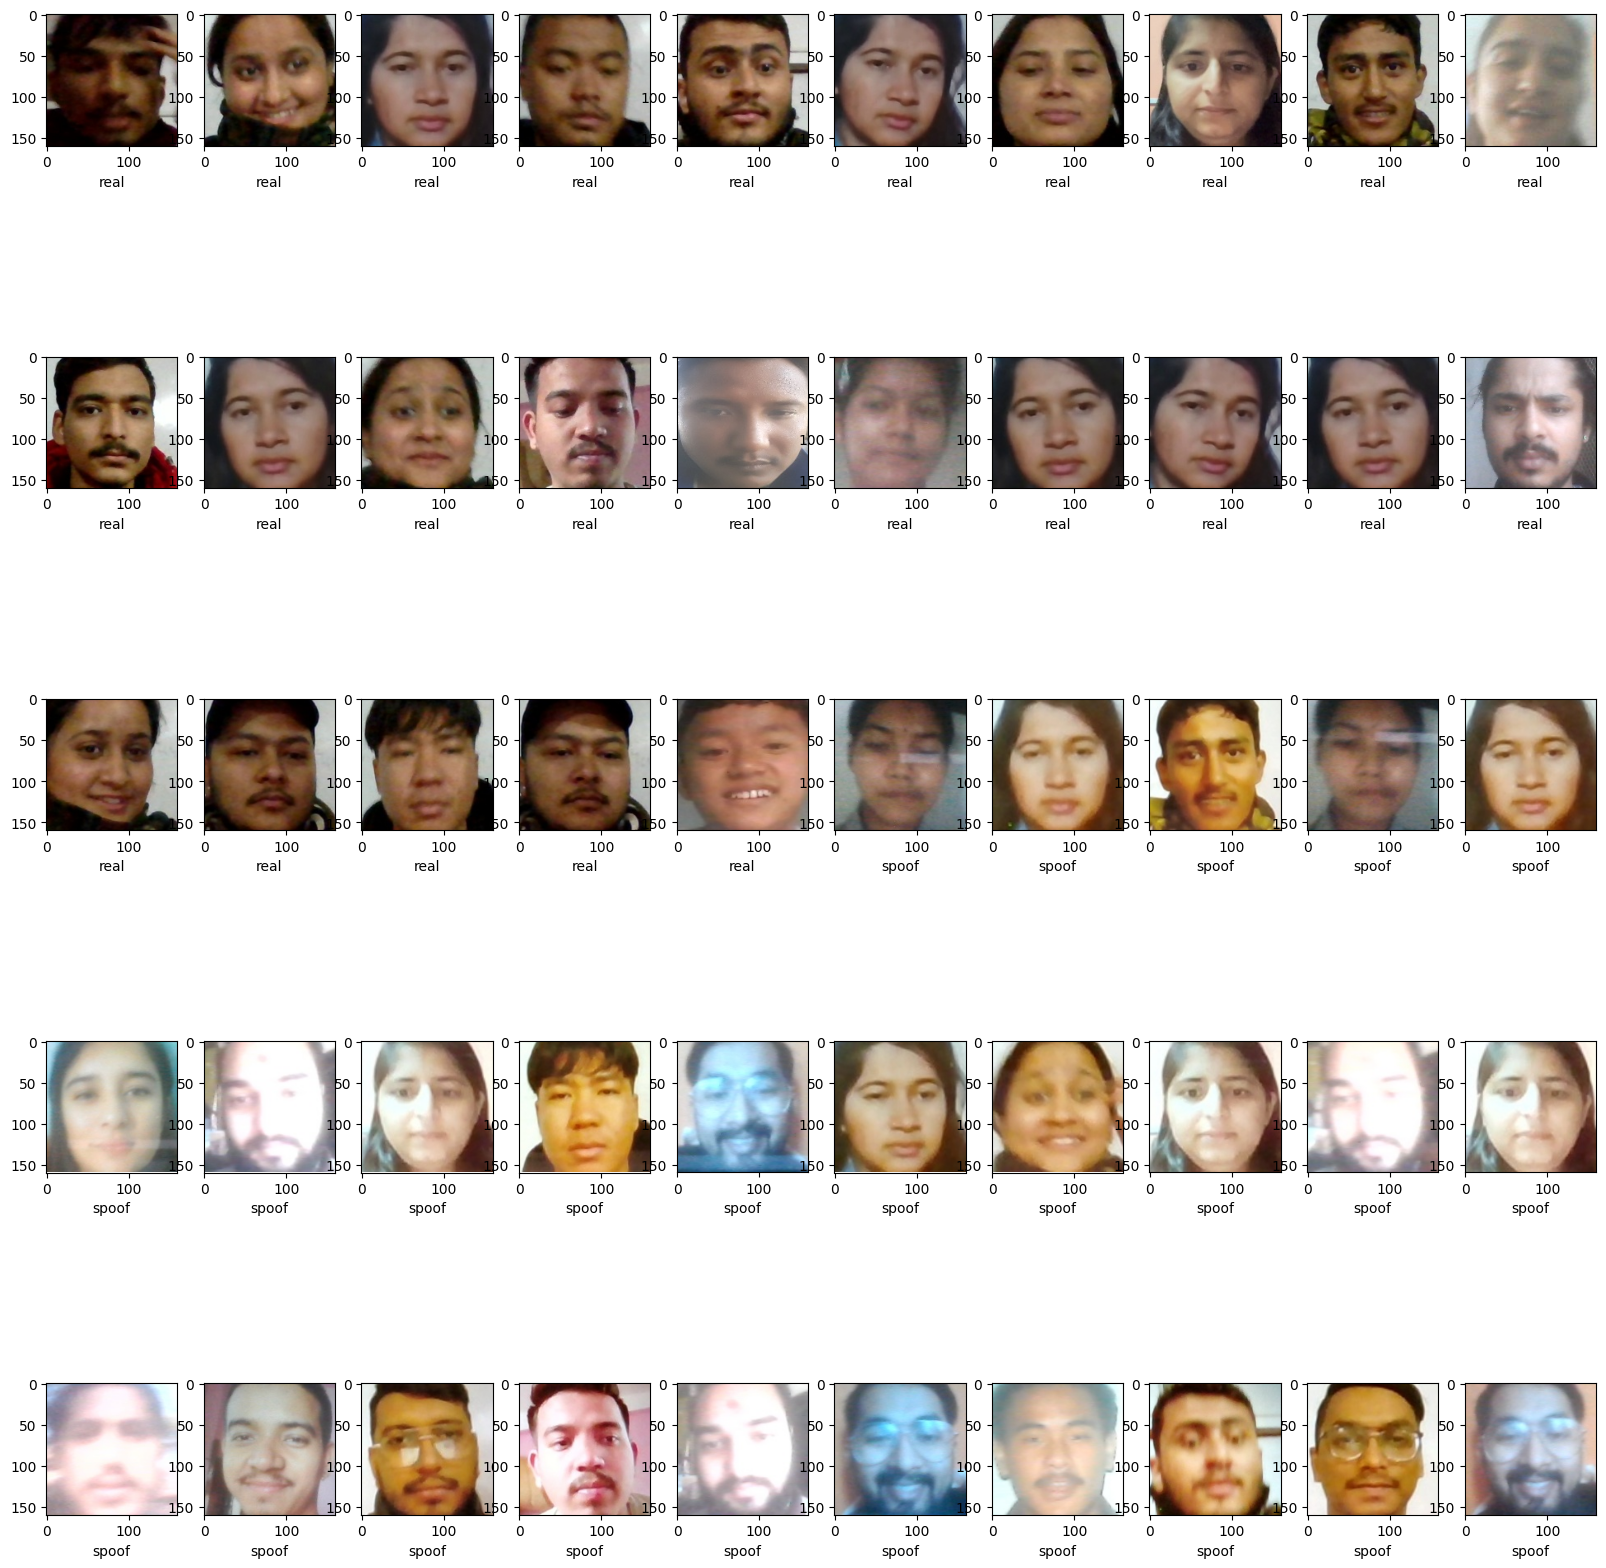

In [16]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

In [17]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json
import keras

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 7481 images belonging to 2 classes.


In [21]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 2737 images belonging to 2 classes.


In [22]:
import tensorflow.keras

In [23]:
from tensorflow.keras.applications import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_shape=(160,160,3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
mobilenet.trainable = False

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dropout, Dense

# Your model code
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units=8, activation='relu')(output)
prediction = Dense(1, activation='sigmoid')(output)


In [26]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,514,001 (9.59 MB)

 Trainable params: 256,017 (1000.07 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
model.compile(
  loss='binary_crossentropy',
  optimizer=tf.keras.optimizers.Adam( # Use tf.keras.optimizers
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [28]:
import os
os.mkdir('/content/model_weights/')

In [29]:
model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [ ]:
history = model.fit( # Use model.fit instead of model.fit_generator
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 200,
    callbacks=[model_checkpoint])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.5552 - loss: 0.7658
Epoch 1: val_loss improved from inf to 0.64483, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.631927.weights.h5
299/299 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.5552 - loss: 0.7657 - val_accuracy: 0.6319 - val_loss: 0.6448
Epoch 2/200
  1/299 ━━━━━━━━━━━━━━━━━━━━ 2:17 463ms/step - accuracy: 0.6400 - loss: 0.6138

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.64483 to 0.55407, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.833333.weights.h5
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6400 - loss: 0.6138 - val_accuracy: 0.8333 - val_loss: 0.5541
Epoch 3/200
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.6177 - loss: 0.6776
Epoch 3: val_loss did not improve from 0.55407
299/299 ━━━━━━━━━━━━━━━━━━━━ 292s 910ms/step - accuracy: 0.6177 - loss: 0.6776 - val_accuracy: 0.6760 - val_loss: 0.6092
Epoch 4/200
  1/299 ━━━━━━━━━━━━━━━━━━━━ 3:44 754ms/step - accuracy: 0.7600 - loss: 0.4935
Epoch 4: val_loss improved from 0.55407 to 0.32998, saving model to ./model_weights/finalyearproject_antispoofing_model_04-1.000000.weights.h5
299/299 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.7600 - loss: 0.4935 - val_accuracy: 1.0000 - val_loss: 0.3300
Epoch 5/200
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.6631 - loss: 0.6293
Epoch 5: val_loss did not improve from 0

In [ ]:
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

In [ ]:
check_fakes(test_dir,categories[0])

In [ ]:
(19+6)/(19+455+471+6)*100

In [ ]:
100-2.6288